# Usage

## Transform access.log files

First you need to transform access log files to CSV:

  `python -m pat.nginx.access_log_to_csv <access_log_files_pattern> > access_log.csv`

## Load request data

Now you can use `pat.nginx` module functions to load request data from CSV:

In [16]:
import pat.nginx as nginx

In [23]:
reqs = nginx.load_access_log_data('test/fixtures/readme-example.csv')

## Get the RPS aggregation from all requests

In [24]:
rps = nginx.aggregate_rps(reqs)

In [25]:
rps.head()

timestamp,count,errors,avg_response_time,successes
1444359670,1,0,0.045,1
1444359671,1,0,0.045,1
1444359672,1,0,0.045,1
1444359673,1,0,0.045,1
1444359674,1,0,0.045,1
1444359675,1,0,0.045,1
1444359676,1,0,0.045,1
1444359677,1,0,0.045,1
1444359678,1,0,0.045,1
1444359679,1,0,0.045,1


## Plot RPS histogram

In [26]:
%matplotlib inline

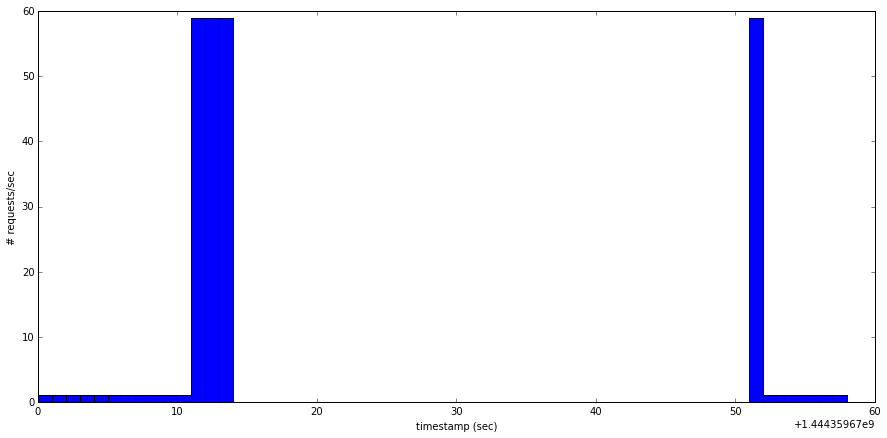

In [27]:
nginx.plot_rps(rps)

**TODO:** Create a better access.log example :)

## Find load periods

In [28]:
load_periods = nginx.find_load_periods(rps, surrounding_period=5, rps_threashold=20, load_pause_period=5)

In [29]:
for lp in load_periods:
    print lp

LoadPeriod(start: 1444359676, end: 1444359726, duration: 50)


## Filter requests for a given interval

In [9]:
l1_reqs, l1_rps = nginx.filter(reqs, load_periods[0].start, load_periods[0].duration())

start: 2015-10-09 00:01:17 (1444359677), end 2015-10-09 00:02:06 (1444359726), elapsed: 49 sec, requests: 246


## Error sumary

In [14]:
nginx.error_summary(reqs)

base_url,method,status_code,count,percent


## Error by host

In [15]:
nginx.errors_by_host(reqs)

log_file,count,errors,err_pct
access-1.log-20151010,253,0,0
